<a href="https://colab.research.google.com/github/ReubenCode/DataScienceA-Z/blob/main/01_neural_Network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro to regression with Neural networks in tensorflow
there are many definitions for a regression problem but in our case, we're going to simplify it: predicting numerical variable based on some other combinations of variables, even shorter predicting a number

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


Creating data to view and fit

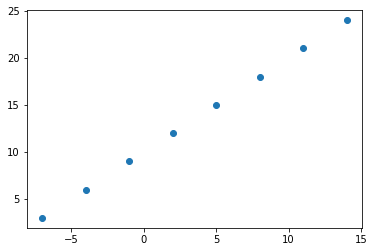

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y);


In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

imput and output shapes

In [ ]:
# Create a demo tensor for out housing price predicition problem.
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

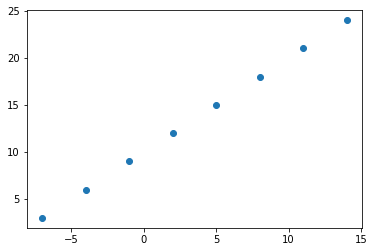

In [ ]:
plt.scatter(X, Y)

# steps in modeling with Tensorflow
1. creating a model - define the input and output layers, as well as hiddel layers of a deep learning model
2. compiling a model - define the loss function in other words the function which tells our model how wrong it is and optimizer tells our models how wrong it is and the optimizer tells our model how to improve the patters its learnnig and evaluating metrics, what we can use to interpret the performance of our model
3. fitting a model - letting the model try to find patterns between X and Y features and labels

In [ ]:
# optionally, the first layer can receive an 'input_shape' argument
#m odel = tf.keras.Sequential()
# model.add(tf.keras.layer.Dense(8, input_shape=(16,)))
# afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                     
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic graditent decent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 963ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out x and y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try and make a predicition using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

Improving our model
we can improve out model, by altering the steps we took to create a model
1. create a model - here we might add more layers.
increase the nmber of hidden units ( all called neurons), change the activation function of each layer
2. compiling a model - here we might change the optimization function or perhaps the learning rate of the optimizing function
3. fitting a model - here we might fit a model for more EPOCHS ( leave it training for longer or on more data) (give the model more data to learn from )

In [ ]:
# lets rebuild our model 
# 1. create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 628ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# lets see if our model's prediciiton improves
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)
            

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 981ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1687 - mae: 9.1687
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 7.0477 - mae: 7.0477
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4551 - mae: 7.4551
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7955 - mae: 7.7955
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.8032 - mae: 7.8032
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5199 -

In [ ]:
model.predict([17.0])

array([[26.485754]], dtype=float32)

Evaluting a model
In practive, a typical workflow you'll go through when building neural networks is:
---
build a model -> fit it -> evaluate it -> tweak a model -> fit it -. tweak a model -> fit it -> evaluate it...

when it comes to evaluation.. there are 3 words you should memorize
> visualize, visualize, visualize

its a good idea to visualize:
the data - what are we working with? what it look like?
the model itself- what does our model look like?
the training model - how does a model perform while it learns?
the predictions of the modle - how do the predictions of a model line up against the ground truth (the orginal labels)?


In [ ]:
# make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

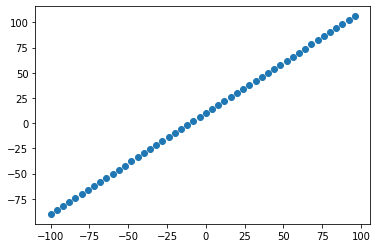

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

# the 3 sets...
* training set - the model learns from this data, which is typically 70-80% of the total data you have available.
*validation set- the model gets tuned on this data, which is typically 10-15% of the ata available.
*test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# check the length of how many samples we have
len(X)

50

In [ ]:
# split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X [40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualing the data
Now we've got our data in training and test sets.. let's viisualize it again!

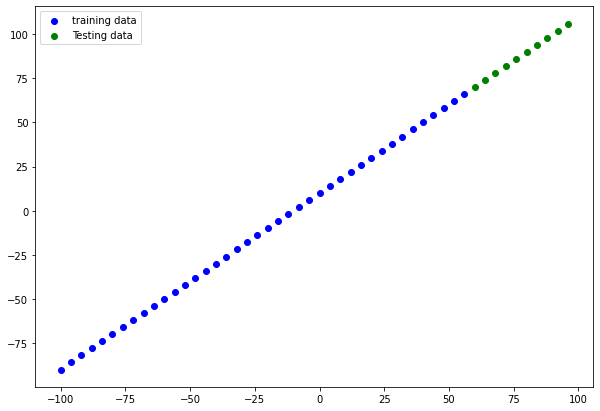

In [ ]:
plt.figure(figsize=(10, 7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")
#plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend();

In [ ]:
# let's have a look at how to build a neural network for our data
# 1. create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.lossess.mae,
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["mae"])

# 3. fit the model
model.fit(X_train, y_train, epochs=100)

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# let's create a model which builds automatically by defining the inout_shape argument
tf.random.set_seed(42)

# 1. create a model ( same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer"),
],  name="model_1")
# 2. compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________




*   Total params - total number of parameters in the model
*   Trinable parameters - tese are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training ( this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)


In [ ]:
# let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


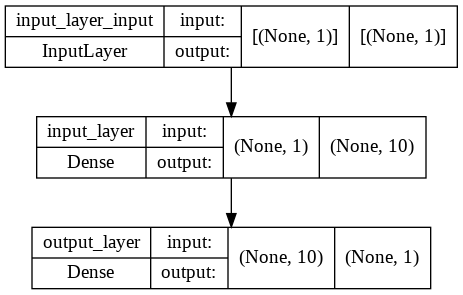

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

often you'll see this in the for of 'y_test' or 'y_truth' verses 'y_pred (ground truth  verses your model)

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑If youre going to reuse some kind of function it is a good idea to save it

In [ ]:
# let's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """Plots training data, test data and compares predicitons to the ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend()

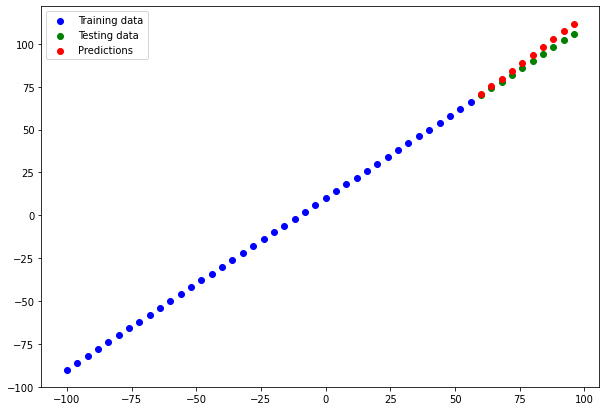

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### evaluting our models predicitons with regression metrics
depending on the problem you're working on, there will be different evaluation metrics to evluate your model's performance

since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, " on average, how wrong is each of my model's predictions"
* MSE - mean square error " square the average errors"

In [ ]:
# evalute the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)